In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

In [4]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:
        experiencePool.add_expericence(exp)

In [5]:
action_values = np.random.rand(25,5)
learning_rate = 0.01
gamma = 0.99
batch_size = 500

  0%|                                                                              | 0/2000 [00:00<?, ?it/s]

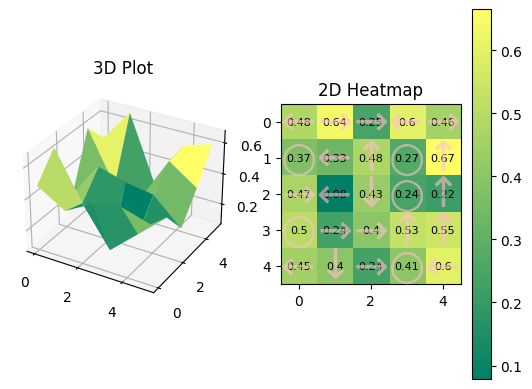

  8%|█████                                                              | 151/2000 [00:00<00:06, 297.07it/s]

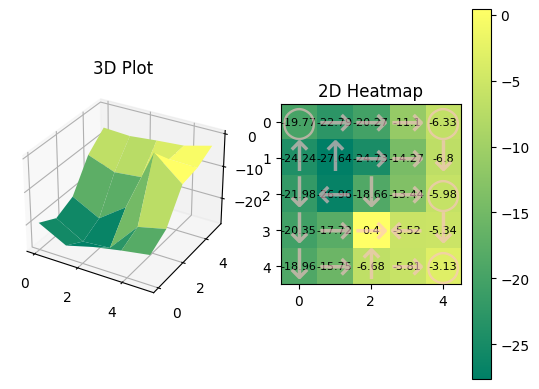

 18%|███████████▊                                                       | 353/2000 [00:01<00:05, 323.17it/s]

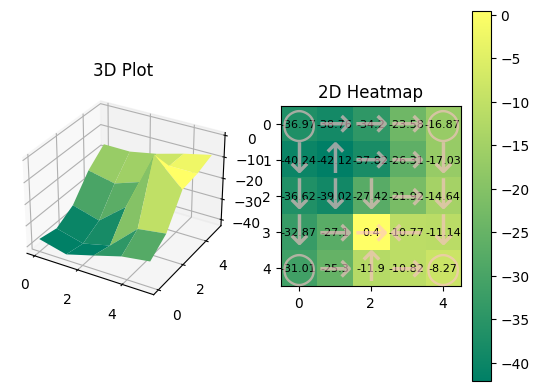

 28%|██████████████████▍                                                | 550/2000 [00:02<00:04, 317.85it/s]

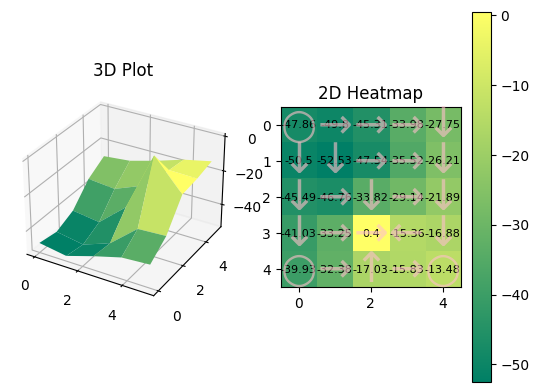

 38%|█████████████████████████▎                                         | 755/2000 [00:03<00:03, 327.79it/s]

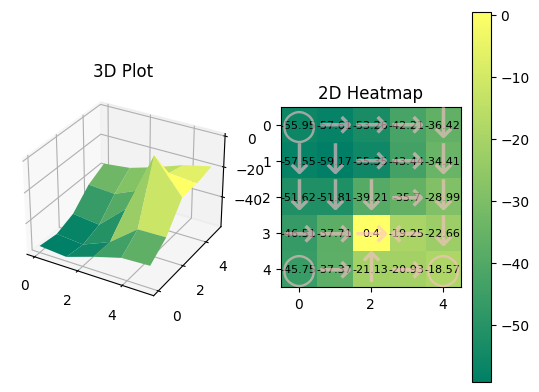

 50%|█████████████████████████████████▏                                 | 990/2000 [00:04<00:02, 355.52it/s]

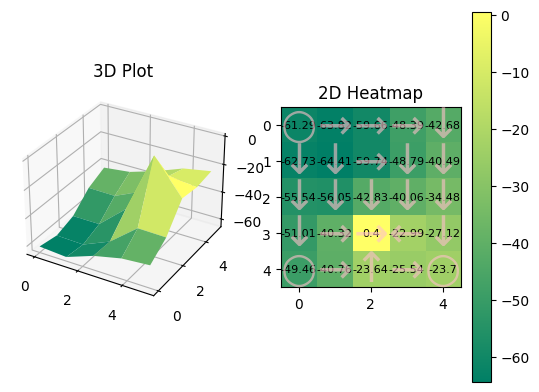

 59%|███████████████████████████████████████▏                          | 1187/2000 [00:04<00:02, 319.90it/s]

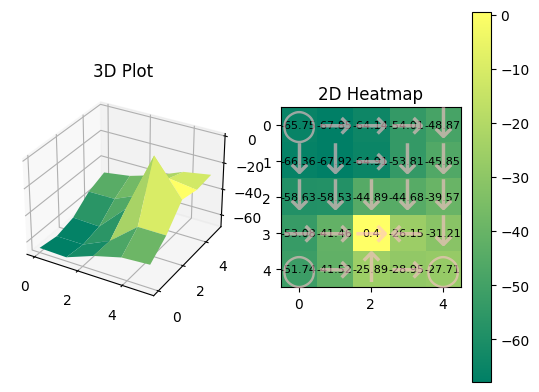

 69%|█████████████████████████████████████████████▋                    | 1385/2000 [00:05<00:01, 324.32it/s]

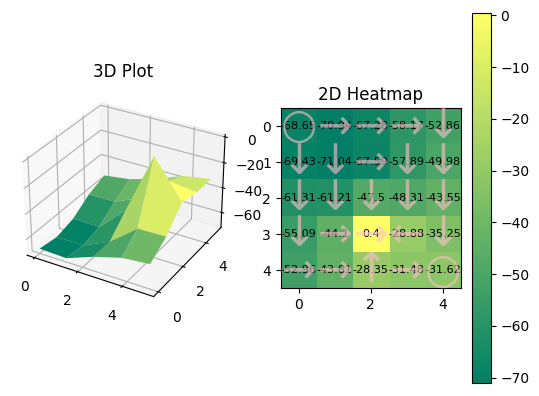

 79%|████████████████████████████████████████████████████▏             | 1580/2000 [00:06<00:01, 317.20it/s]

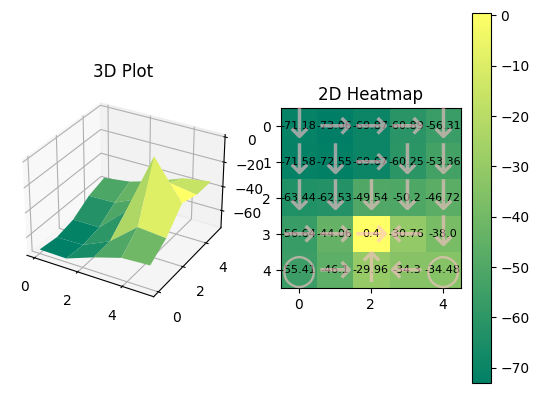

 89%|██████████████████████████████████████████████████████████▋       | 1777/2000 [00:07<00:00, 321.12it/s]

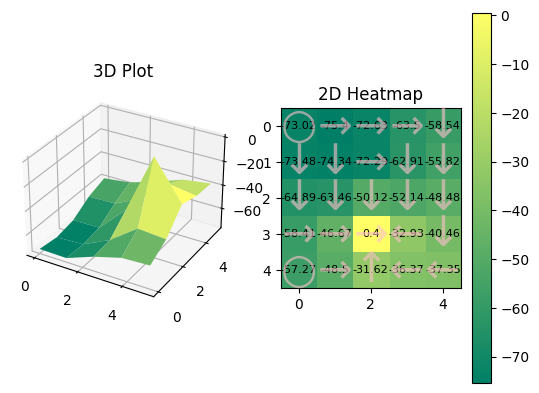

100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:08<00:00, 244.42it/s]


In [6]:
for _ in tqdm.tqdm(range(2000)):
    exps = experiencePool.sample_exps(batch_size=batch_size)
    for trajectory in exps:
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
        
        next_action_value = action_values[nextState][nextAction]
        target = tmpscore + (1.0 - terminal) * gamma * next_action_value
        
        TD_error = action_values[tmpstate][tmpaction] - target
        action_values[tmpstate][tmpaction] -= learning_rate * TD_error
    if _ % 200 == 0:
        state_values = np.sum(policy * action_values,axis=1)
        p = np.argmax(action_values,axis=1)
        draw(state_values.reshape(5,5), p)